## LSTAT と MEDV の散布図

In [109]:
import numpy
from matplotlib import pyplot
import japanize_matplotlib
from pandas import DataFrame
from sklearn.datasets import load_boston

In [110]:
boston = load_boston()
X = boston.data
y = boston.target

feature_names = boston.feature_names

df = DataFrame(data=X, columns=feature_names)
df['MEDV'] = y

display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


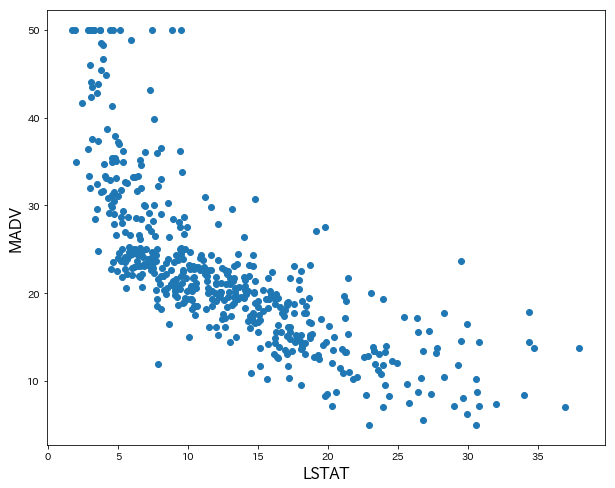

In [111]:
# matplotlib の scatter() メソッドを利用して散布図をプロット

fig = pyplot.figure(figsize=(10, 8))

pyplot.scatter(df['LSTAT'].values, df['MEDV'].values)

pyplot.xlabel('LSTAT', fontsize=16)
pyplot.ylabel('MADV', fontsize=16)
pyplot.show()

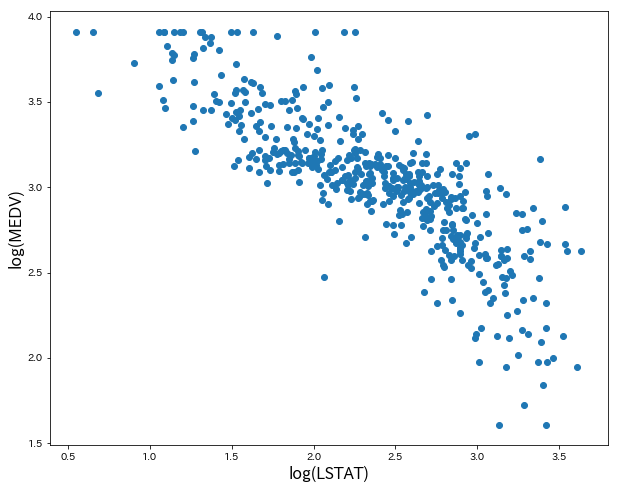

In [112]:
# 指数関数で表現できる関係は、対数をとると直線で表現できる

fig = pyplot.figure(figsize=(10, 8))

# 対数をとって、散布図をプロットしてみる
pyplot.scatter(numpy.log(df['LSTAT'].values), numpy.log(df['MEDV'].values))

pyplot.xlabel('log(LSTAT)', fontsize=16)
pyplot.ylabel('log(MEDV)', fontsize=16)

pyplot.show()

## MEDVの分布
- MEDV のヒストグラムをプロットする。これは、MEDV の値を ビン (bin) という、ある範囲毎にまとめ、そのサンプル数をプロットしたもので、横軸が bin の範囲、縦軸が bin に含まれるサンプル数を表す。

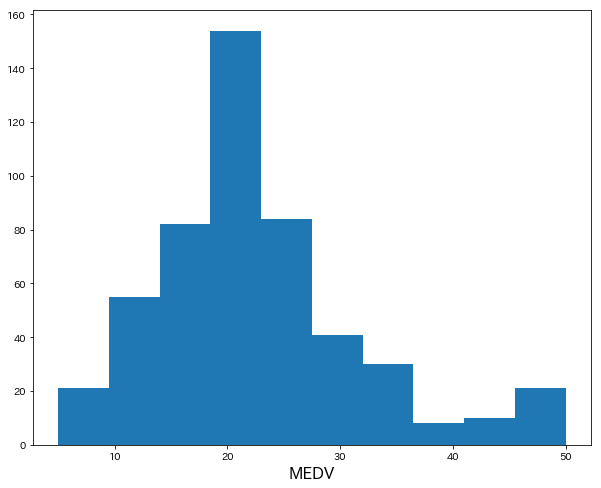

In [113]:
fig = pyplot.figure(figsize=(10, 8))

# ヒストグラムのプロット
pyplot.hist(df['MEDV'].values)

pyplot.xlabel('MEDV', fontsize=16)
pyplot.show()

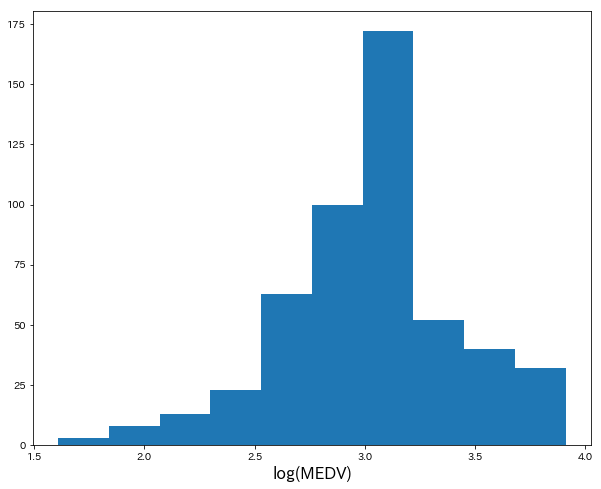

In [114]:
# 対数をとってみる
fig = pyplot.figure(figsize=(10, 8))

# numpy.log を使って対数を計算し、ヒストグラムのプロット
pyplot.hist(numpy.log(df['MEDV'].values))

pyplot.xlabel('log(MEDV)', fontsize=16)
pyplot.show()

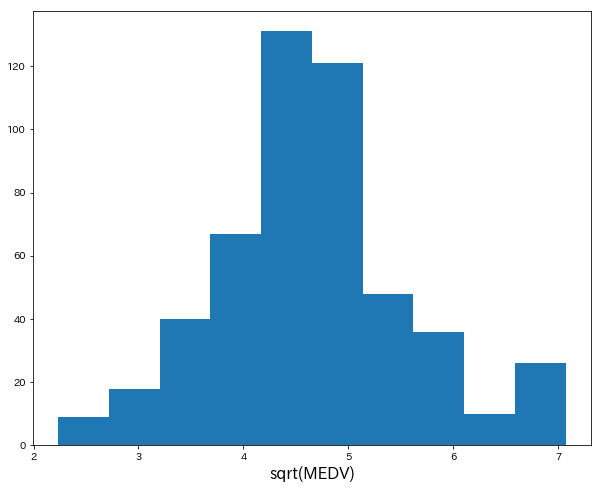

In [115]:
# 平方根をプロットしてみる
fig = pyplot.figure(figsize=(10, 8))

# numpy.sqrt を使って平方根を計算し、ヒストグラムのプロット
pyplot.hist(numpy.sqrt(df['MEDV'].values))

pyplot.xlabel('sqrt(MEDV)', fontsize=16)
pyplot.show()

# 中央にデータが揃うのは統計学的、線形回帰的にメリットが多い

### LSTATの分布

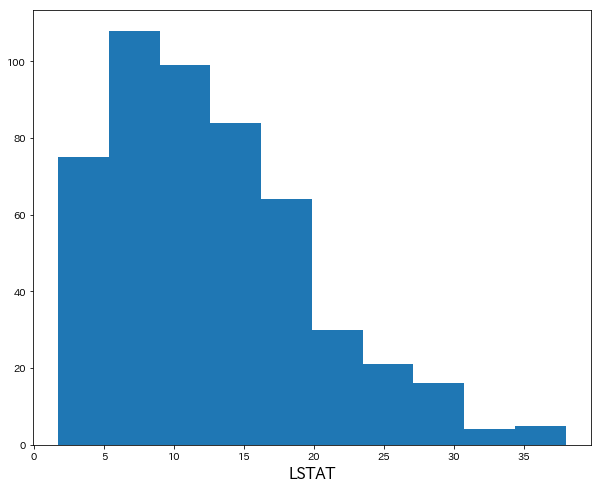

In [116]:
fig = pyplot.figure(figsize=(10, 8))

# ヒストグラムのプロット
pyplot.hist(df['LSTAT'].values)

pyplot.xlabel('LSTAT', fontsize=16)
pyplot.show()

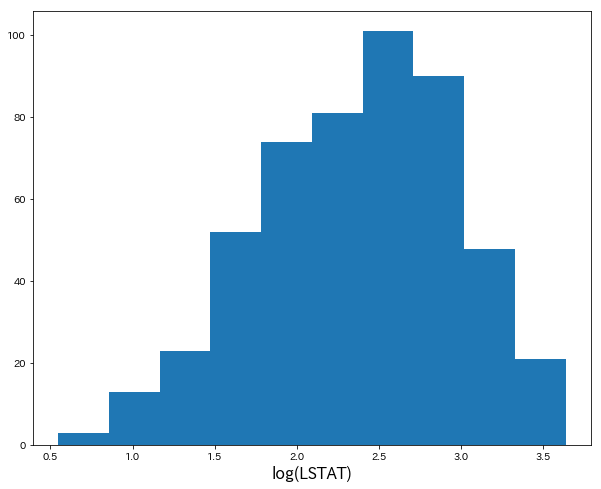

In [117]:
# 対数をとってみる
fig = pyplot.figure(figsize=(10, 8))

# numpy.log を使って対数を計算し、プロットする
pyplot.hist(numpy.log(df['LSTAT'].values))

pyplot.xlabel('log(LSTAT)', fontsize=16)
pyplot.show()

# 左右対称に近づいた

## 再度LSTAT と MEDV の散布図
- LSTAT（log）, MEDV（sqrt）

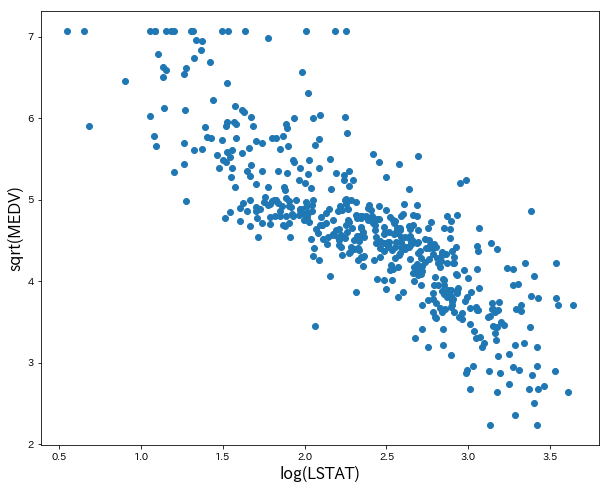

In [118]:
fig = pyplot.figure(figsize=(10, 8))

# 散布図のプロット
pyplot.scatter(numpy.log(df['LSTAT'].values), numpy.sqrt(df['MEDV'].values))

pyplot.xlabel('log(LSTAT)', fontsize=16)
pyplot.ylabel('sqrt(MEDV)', fontsize=16)
pyplot.show()

## RMとMEDVの散布図

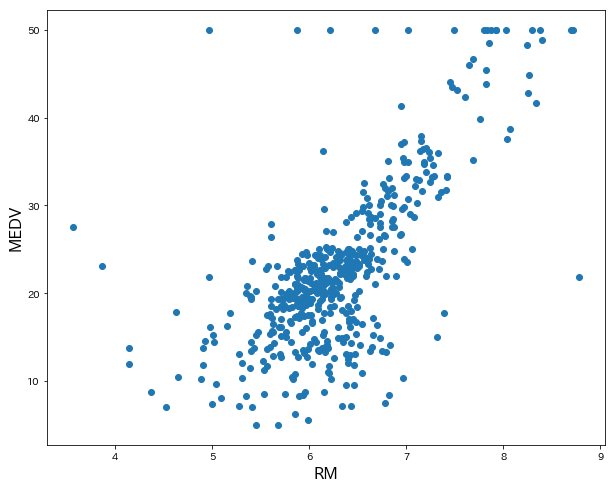

In [119]:
fig = pyplot.figure(figsize=(10, 8))

# 散布図のプロット
pyplot.scatter(df['RM'].values, df['MEDV'].values)

pyplot.xlabel('RM', fontsize=16)
pyplot.ylabel('MEDV', fontsize=16)
pyplot.show()

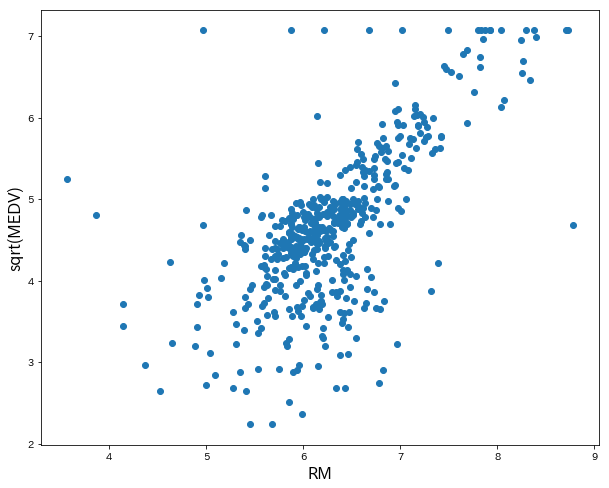

In [120]:
# MEDV の平方根との散布図をプロット
fig = pyplot.figure(figsize=(10, 8))

# 散布図のプロット
pyplot.scatter(df['RM'].values, numpy.sqrt(df['MEDV'].values))

pyplot.xlabel('RM', fontsize=16)
pyplot.ylabel('sqrt(MEDV)', fontsize=16)
pyplot.show()

## LSTATは対数をとる、MEDVは平方根を取るときれいになりそう
## 上記で学習を行ってみる

In [121]:
df[['RM', 'LSTAT', 'MEDV']].head()

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [122]:
# データに関数を適用させるapply
df['LSTAT'] = df['LSTAT'].apply(numpy.log)  # 対数を計算する
df['MEDV'] = df['MEDV'].apply(numpy.sqrt)  # 平方根を計算する

df[['RM', 'LSTAT', 'MEDV']].head()

,RM,LSTAT,MEDV
0,6.575,1.605430,4.898979
1,6.421,2.212660,4.647580
2,7.185,1.393766,5.890671
3,6.998,1.078410,5.779273
4,7.147,1.673351,6.016644


## 学習データの作成

In [123]:
X = df[['RM', 'LSTAT']].values
y = df['MEDV'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train0 = X_train[:, 0].reshape(-1, 1)  # 訓練データのRM
X_train1 = X_train[:, 1].reshape(-1, 1)  # 訓練データのLSTAT
X_test0 = X_test[:, 0].reshape(-1, 1)  # テストデータのRM
X_test1 = X_test[:, 1].reshape(-1, 1)  # テストデータのLSTAT

## 前処理

In [124]:
from sklearn.preprocessing import StandardScaler

# RM はこれまで通りの標準化
standerd_scaler1 = StandardScaler()
X_train_scaled0 = standerd_scaler1.fit_transform(X_train0)
X_test_scaled0 = standerd_scaler1.transform(X_test0)

# 新しい LSTAT にも標準化を適用する
standerd_scaler2 = StandardScaler()
X_train_scaled1 = standerd_scaler2.fit_transform(X_train1)
X_test_scaled1 = standerd_scaler2.transform(X_test1)

X_train_scaled = numpy.zeros(X_train.shape)
X_train_scaled[:, 0] = X_train_scaled0.reshape(-1)
X_train_scaled[:, 1] = X_train_scaled1.reshape(-1)
display(DataFrame(X_train_scaled).head())

X_test_scaled = numpy.zeros(X_test.shape)
X_test_scaled[:, 0] = standerd_scaler1.transform(X_test0).reshape(-1)
X_test_scaled[:, 1] = standerd_scaler2.transform(X_test1).reshape(-1)
display(DataFrame(X_test_scaled).head())

,0,1
0,0.145264,-1.155789
1,-0.208401,0.229119
2,-0.896237,-0.043458
3,-0.543965,-0.769815
4,-0.556496,0.905877


,0,1
0,0.125771,-0.244681
1,0.601965,-1.799396
2,-0.477130,0.900396
3,-0.362955,-1.060231
4,-0.039923,0.825530


## 単回帰

In [125]:
# SGDRegressor を import。
from sklearn.linear_model import SGDRegressor

# SGDRegressor のインスタンスを作成。
reg1 = SGDRegressor(loss='squared_loss', max_iter=2000, tol=1e-3, penalty='none', random_state=42)

reg1.fit(X_train_scaled1, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=2000,
             n_iter_no_change=5, penalty='none', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [126]:
# score() メソッドを利用して、決定係数を計算
print(reg1.score(X_train_scaled1, y_train))
print(reg1.score(X_test_scaled1, y_test))

0.7019900164215708
0.6523882757986906


### データのプロット

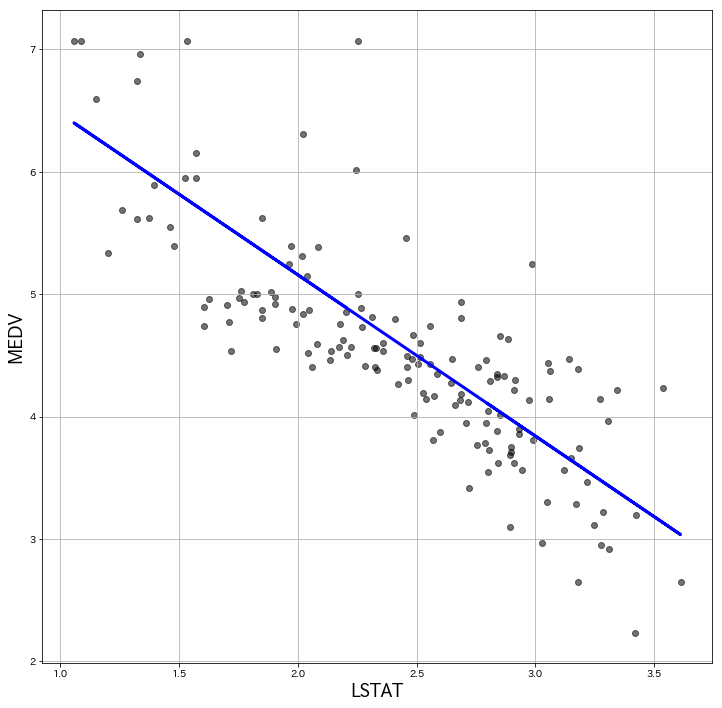

In [127]:
# テストデータの予測値
y_pred = reg1.predict(X_test_scaled1)

fig = pyplot.figure(figsize=(12,12))
pyplot.scatter(X_test1, y_test, color='black', alpha=0.55)
pyplot.plot(X_test1, y_pred, linewidth=3, color='blue')

pyplot.xlabel('LSTAT', fontsize=18)
pyplot.ylabel('MEDV', fontsize=18)
pyplot.grid()
pyplot.show()

## 重回帰

In [128]:
reg = SGDRegressor(loss='squared_loss', max_iter=1000, tol=1e-3, penalty='none', random_state=42)

reg.fit(X_train_scaled, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='none', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [130]:
reg.score(X_train_scaled, y_train)

0.7243574942545064

In [131]:
reg.score(X_test_scaled, y_test)

0.6910445589072797